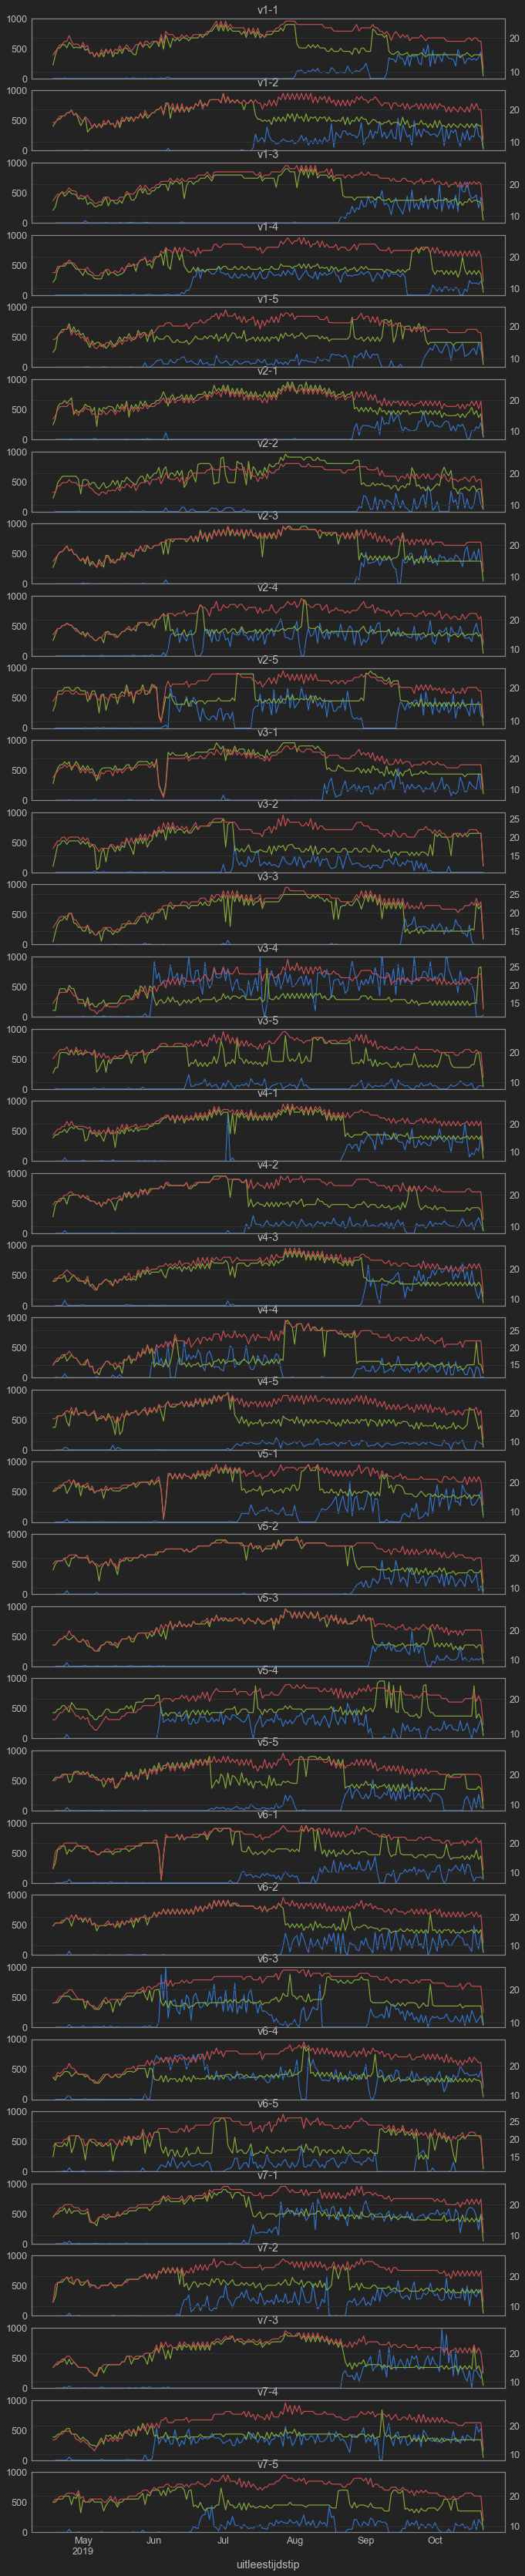

In [5]:
import pandas as pd
import os

from jupyterthemes import jtplot

jtplot.style()

df = pd.read_csv(os.path.join('..', 'data', 'Temperatuur_Flow.csv'))
df['uitleestijdstip'] = pd.to_datetime(df['uitleestijdstip'])
df.set_index('uitleestijdstip', inplace=True)
df['volume (l)'] = (df['volume 1'] - df['volume 1'].shift(1))*1000
apps = df['v-app'].unique()
df = df.groupby([pd.Grouper(freq='1D'), 'v-app']).sum().unstack('v-app')

fig, ax = plt.subplots(nrows=len(apps), figsize=(11, 60))

for idx, app in enumerate(apps):
    df['volume (l)'][app].plot(ax=ax[idx], ylim=(0,1000), title=app)
    (df['gelogde min. mediumtemp.'][app]/24).plot(ax=ax[idx], secondary_y=True)
    (df['gelogde gemiddelde omgevingstemp.'][app]/24).plot(ax=ax[idx], secondary_y=True)